In [1]:
%pip install pandas --quiet
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
"""
This test was ran 3 times at each vehicle speed at the same seed (i.e. the same vehicle starting points were used for)
each run at the different speeds so we could have variance in starting position across the 3 runs whilst also getting
consistency and comparability across the different vehicle speeds
"""

simulation_params = {
    'test-runs': 3,
    'num-hosts': 20,
    'num-rsu': 1,
    'num-jammer': 1
}

In [4]:
# Load the two CSV files into pandas dataframes
df_old = pd.read_csv('./vehicle_speed/legacyResults.txt')
df_new = pd.read_csv('./vehicle_speed/results.txt')
df_snr = pd.read_csv('./vehicle_speed/snrResults.txt')

#df_new['JLE'] = df_new['JLE'] / 150
#df_old['JLE'] = df_new['JLE'] / 150
#df_snr['JLE'] = df_new['JLE'] / 150

# Recalculate accuracy for both old and new solutions
df_new['accuracy'] = ((df_new['tp'] + df_new['tn']) / (df_new['tp'] + df_new['fp'] + df_new['tn'] + df_new['fn'])) * 100
df_old['accuracy'] = ((df_old['tp'] + df_old['tn']) / (df_old['tp'] + df_old['fp'] + df_old['tn'] + df_old['fn'])) * 100
df_snr['accuracy'] = ((df_snr['tp'] + df_snr['tn']) / (df_snr['tp'] + df_snr['fp'] + df_snr['tn'] + df_snr['fn'])) * 100

# Add a column to each dataframe to indicate the solution type
df_old['Solution'] = 'Old Solution'
df_new['Solution'] = 'New Solution'
df_snr['Solution'] = 'SNR Solution'
num_runs = df_new['runName'].nunique()

solution_mapping = {
    'Old Solution': 'NJS',
    'New Solution': 'NJS-M',
    'SNR Solution': 'T-SNR'
}

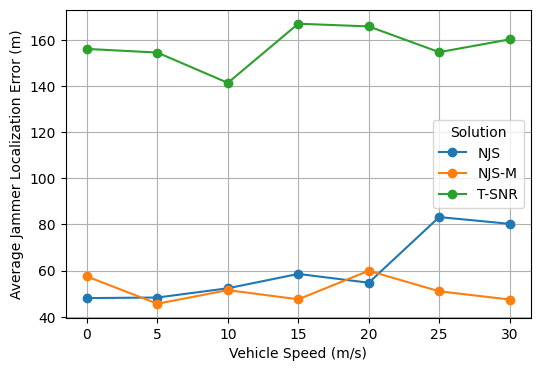

In [5]:
# Combine the dataframes
df_combined = pd.concat([df_old, df_new, df_snr])

# Create a mapping for the solution names
solution_mapping = {
    'Old Solution': 'NJS',
    'New Solution': 'NJS-M',
    'SNR Solution': 'T-SNR'
}

df_combined['Solution'] = df_combined['Solution'].map(solution_mapping)

# Group by vSpeed and Solution, and calculate the average JLE for each
df_avg = df_combined.groupby(['vSpeed', 'Solution'])['JLE'].mean().reset_index()

# Create the line plot for average JLE vs vSpeed
plt.figure(figsize=(6, 4))
for solution in df_avg['Solution'].unique():
    solution_data = df_avg[df_avg['Solution'] == solution]
    plt.plot(solution_data['vSpeed'], solution_data['JLE'], label=solution, marker='o')

plt.xlabel('Vehicle Speed (m/s)')
plt.ylabel('Average Jammer Localization Error (m)')
plt.legend(title='Solution')
plt.grid(True)
plt.show()


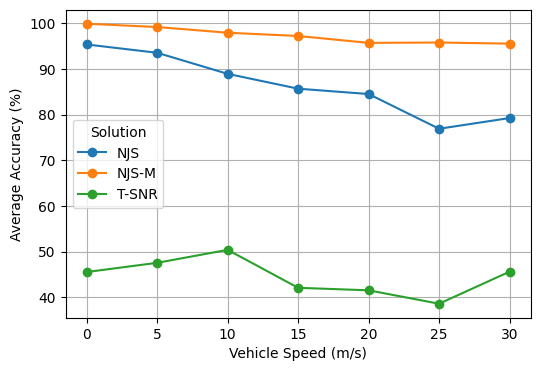

In [7]:
# Combine the dataframes
df_combined = pd.concat([df_old, df_new, df_snr])

# Create a mapping for the solution names
solution_mapping = {
    'Old Solution': 'NJS',
    'New Solution': 'NJS-M',
    'SNR Solution': 'T-SNR'
}

df_combined['Solution'] = df_combined['Solution'].map(solution_mapping)

# Group by vSpeed and Solution, and calculate the average JLE for each
df_avg = df_combined.groupby(['vSpeed', 'Solution'])['accuracy'].mean().reset_index()

# Create the line plot for average JLE vs vSpeed
plt.figure(figsize=(6, 4))
for solution in df_avg['Solution'].unique():
    solution_data = df_avg[df_avg['Solution'] == solution]
    plt.plot(solution_data['vSpeed'], solution_data['accuracy'], label=solution, marker='o')

plt.xlabel('Vehicle Speed (m/s)')
plt.ylabel('Average Accuracy (%)')
plt.legend(title='Solution')
plt.grid(True)
plt.show()
